In [1]:

from io import StringIO
import requests
import json
import pandas as pd
import numpy as np

# @hidden_cell
# This function accesses a file in your Object Storage. The definition contains your credentials.
# You might want to remove those credentials before you share your notebook.
def get_object_storage_file_with_credentials_b6d2dc4304df42d5bf425b6ca8af67ff(container, filename):
    """This functions returns a StringIO object containing
    the file content from Bluemix Object Storage."""

    url1 = ''.join(['https://identity.open.softlayer.com', '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': 'member_cd9be0e4ff1994ebede81451af2f9ee17e1d0d66','domain': {'id': '9d54dfb7f46d48d8930e2e61e1e7ddab'},
            'password': 'IbA26vS(8zQl.2_P'}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                        if(e2['interface']=='public'and e2['region']=='dallas'):
                            url2 = ''.join([e2['url'],'/', container, '/', filename])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.get(url=url2, headers=headers2)
    return StringIO(resp2.text)

df_data_1 = pd.read_csv(get_object_storage_file_with_credentials_b6d2dc4304df42d5bf425b6ca8af67ff('LendingClub', 'Processed_Accepted.csv'))
df_data_1.head()


/usr/local/src/conda3_runtime/4.1.1/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (61,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,acc_now_delinq,acc_open_past_24mths,addr_state,all_util,annual_inc,annual_inc_joint,application_type,avg_cur_bal,bc_open_to_buy,bc_util,...,total_rev_hi_lim,url,verification_status,verification_status_joint,zip_code,fico_range,meanfico,last_fico_range,last_meanfico,credit_age
0,0,NaN,GA,NaN,30000,NaN,INDIVIDUAL,NaN,NaN,NaN,...,NaN,https://lendingclub.com/browse/loanDetail.acti...,Source Verified,NaN,309,740-744,742,0-499,249,17
1,0,NaN,CA,NaN,49200,NaN,INDIVIDUAL,NaN,NaN,NaN,...,NaN,https://lendingclub.com/browse/loanDetail.acti...,Source Verified,NaN,917,690-694,692,600-604,602,20
2,0,NaN,OR,NaN,80000,NaN,INDIVIDUAL,NaN,NaN,NaN,...,NaN,https://lendingclub.com/browse/loanDetail.acti...,Source Verified,NaN,972,695-699,697,690-694,692,21
3,0,NaN,NC,NaN,47004,NaN,INDIVIDUAL,NaN,NaN,NaN,...,NaN,https://lendingclub.com/browse/loanDetail.acti...,Not Verified,NaN,280,690-694,692,650-654,652,11
4,0,NaN,CA,NaN,48000,NaN,INDIVIDUAL,NaN,NaN,NaN,...,NaN,https://lendingclub.com/browse/loanDetail.acti...,Source Verified,NaN,900,660-664,662,685-689,687,7


In [2]:
df=df_data_1

In [3]:
df.loan_status.value_counts()

Current                                                732213
Fully Paid                                             431475
Charged Off                                            109989
Late (31-120 days)                                      18847
In Grace Period                                         10297
Late (16-30 days)                                        4274
Does not meet the credit policy. Status:Fully Paid       1926
Does not meet the credit policy. Status:Charged Off       740
Default                                                    26
Name: loan_status, dtype: int64

In [4]:
df['accept_reject_loan'] = np.where((df['loan_status'] == "Does not meet the credit policy. Status:Fully Paid")  | (df['loan_status']=="Does not meet the credit policy. Status:Charged Off"),1,0)

In [5]:
df['accept_reject_loan'].value_counts()

0    1307121
1       2666
Name: accept_reject_loan, dtype: int64

In [6]:

df_data_2 = pd.read_csv(get_object_storage_file_with_credentials_b6d2dc4304df42d5bf425b6ca8af67ff('LendingClub', 'processed_declined.csv'))
df_data_2.head()


,Amount Requested,download_timestamp,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code,Policy Codee
0,1000,2017-04-07 17:56:41,2007-05-26,Wedding Covered but No Honeymoon,693,10.00,481,NM,4,0,0
1,1000,2017-04-07 17:56:41,2007-05-26,Consolidating Debt,703,10.00,10,MA,1,0,0
2,11000,2017-04-07 17:56:41,2007-05-27,Want to consolidate my debt,715,10.00,212,MD,1,0,0
3,6000,2017-04-07 17:56:41,2007-05-27,waksman,698,38.64,17,MA,1,0,0
4,1500,2017-04-07 17:56:41,2007-05-27,mdrigo,509,9.43,209,MD,1,0,0


In [7]:
df_declined=df_data_2
df_declined.columns = [x.strip().replace(' ', '_') for x in df_declined.columns]
df_declined.columns

Index(['Amount_Requested', 'download_timestamp', 'Application_Date',
       'Loan_Title', 'Risk_Score', 'Debt-To-Income_Ratio', 'Zip_Code', 'State',
       'Employment_Length', 'Policy_Code', 'Policy_Codee'],
      dtype='object')

In [8]:
drop_list = ['Policy_Codee']
df_declined = df_declined.drop(drop_list,axis=1)
df_declined.head()

,Amount_Requested,download_timestamp,Application_Date,Loan_Title,Risk_Score,Debt-To-Income_Ratio,Zip_Code,State,Employment_Length,Policy_Code
0,1000,2017-04-07 17:56:41,2007-05-26,Wedding Covered but No Honeymoon,693,10.00,481,NM,4,0
1,1000,2017-04-07 17:56:41,2007-05-26,Consolidating Debt,703,10.00,10,MA,1,0
2,11000,2017-04-07 17:56:41,2007-05-27,Want to consolidate my debt,715,10.00,212,MD,1,0
3,6000,2017-04-07 17:56:41,2007-05-27,waksman,698,38.64,17,MA,1,0
4,1500,2017-04-07 17:56:41,2007-05-27,mdrigo,509,9.43,209,MD,1,0


In [9]:
drop_list = ['download_timestamp']
df_declined = df_declined.drop(drop_list,axis=1)
df_declined.head()

,Amount_Requested,Application_Date,Loan_Title,Risk_Score,Debt-To-Income_Ratio,Zip_Code,State,Employment_Length,Policy_Code
0,1000,2007-05-26,Wedding Covered but No Honeymoon,693,10.00,481,NM,4,0
1,1000,2007-05-26,Consolidating Debt,703,10.00,10,MA,1,0
2,11000,2007-05-27,Want to consolidate my debt,715,10.00,212,MD,1,0
3,6000,2007-05-27,waksman,698,38.64,17,MA,1,0
4,1500,2007-05-27,mdrigo,509,9.43,209,MD,1,0


In [10]:
df_declined['accept_reject_loan']=1

In [11]:
df_declined.head()

,Amount_Requested,Application_Date,Loan_Title,Risk_Score,Debt-To-Income_Ratio,Zip_Code,State,Employment_Length,Policy_Code,accept_reject_loan
0,1000,2007-05-26,Wedding Covered but No Honeymoon,693,10.00,481,NM,4,0,1
1,1000,2007-05-26,Consolidating Debt,703,10.00,10,MA,1,0,1
2,11000,2007-05-27,Want to consolidate my debt,715,10.00,212,MD,1,0,1
3,6000,2007-05-27,waksman,698,38.64,17,MA,1,0,1
4,1500,2007-05-27,mdrigo,509,9.43,209,MD,1,0,1


In [12]:
#columns = ['loan_amnt', 'issue_d','title','purpose','fico_range','meanfico','dti','zip_code','addr_state','emp_length','policy_code']
columns = ['loan_amnt', 'issue_d','title','meanfico','dti','zip_code','addr_state','emp_length','policy_code','accept_reject_loan']
df_accepted_tmp = pd.DataFrame(df, columns=columns)
df_accepted_tmp.head()

,loan_amnt,issue_d,title,meanfico,dti,zip_code,addr_state,emp_length,policy_code,accept_reject_loan
0,2500,Dec-2011,bike,742,1.00,309,GA,1,1,0
1,10000,Dec-2011,personel,692,20.00,917,CA,10,1,0
2,3000,Dec-2011,Personal,697,17.94,972,OR,1,1,0
3,7000,Dec-2011,Loan,692,23.51,280,NC,8,1,0
4,3000,Dec-2011,Car Downpayment,662,5.35,900,CA,9,1,0


In [13]:
df_accepted_tmp.rename(columns={'loan_amnt': 'Amount_Requested', 'issue_d': 'Application_Date','title': 'Loan_Title','meanfico': 'Risk_Score','dti': 'Debt-To-Income_Ratio','zip_code': 'Zip_Code','addr_state':'State','emp_length':'Employment_Length','policy_code':'Policy_Code'}, inplace=True)

In [14]:


df_accepted_tmp.head()

,Amount_Requested,Application_Date,Loan_Title,Risk_Score,Debt-To-Income_Ratio,Zip_Code,State,Employment_Length,Policy_Code,accept_reject_loan
0,2500,Dec-2011,bike,742,1.00,309,GA,1,1,0
1,10000,Dec-2011,personel,692,20.00,917,CA,10,1,0
2,3000,Dec-2011,Personal,697,17.94,972,OR,1,1,0
3,7000,Dec-2011,Loan,692,23.51,280,NC,8,1,0
4,3000,Dec-2011,Car Downpayment,662,5.35,900,CA,9,1,0


In [15]:

df_accepted_tmp['Application_Date']=pd.to_datetime(df_accepted_tmp['Application_Date'],format ='%b-%Y')

In [16]:
df_accepted_tmp['Application_Date']

0         2011-12-01
1         2011-12-01
2         2011-12-01
3         2011-12-01
4         2011-12-01
5         2011-12-01
6         2011-12-01
7         2011-12-01
8         2011-12-01
9         2011-12-01
10        2011-12-01
11        2011-12-01
12        2011-12-01
13        2011-12-01
14        2011-12-01
15        2011-12-01
16        2011-12-01
17        2011-12-01
18        2011-12-01
19        2011-12-01
20        2011-12-01
21        2011-12-01
22        2011-12-01
23        2011-12-01
24        2011-12-01
25        2011-12-01
26        2011-12-01
27        2011-12-01
28        2011-12-01
29        2011-12-01
             ...    
1309757   2016-10-01
1309758   2016-10-01
1309759   2016-10-01
1309760   2016-10-01
1309761   2016-10-01
1309762   2016-10-01
1309763   2016-10-01
1309764   2016-10-01
1309765   2016-10-01
1309766   2016-10-01
1309767   2016-10-01
1309768   2016-10-01
1309769   2016-10-01
1309770   2016-10-01
1309771   2016-10-01
1309772   2016-10-01
1309773   201

In [17]:
frames = [df_accepted_tmp, df_declined]
result = pd.concat(frames)
result.head()

,Amount_Requested,Application_Date,Loan_Title,Risk_Score,Debt-To-Income_Ratio,Zip_Code,State,Employment_Length,Policy_Code,accept_reject_loan
0,2500,2011-12-01 00:00:00,bike,742,1.00,309,GA,1,1,0
1,10000,2011-12-01 00:00:00,personel,692,20.00,917,CA,10,1,0
2,3000,2011-12-01 00:00:00,Personal,697,17.94,972,OR,1,1,0
3,7000,2011-12-01 00:00:00,Loan,692,23.51,280,NC,8,1,0
4,3000,2011-12-01 00:00:00,Car Downpayment,662,5.35,900,CA,9,1,0


In [22]:
result[result.Risk_Score>850].shape

(10981, 10)

In [26]:
result.accept_reject_loan.value_counts()

1    4679254
0    1307121
Name: accept_reject_loan, dtype: int64

In [27]:
from sklearn.utils import shuffle
result = shuffle(result)
result.head()

,Amount_Requested,Application_Date,Loan_Title,Risk_Score,Debt-To-Income_Ratio,Zip_Code,State,Employment_Length,Policy_Code,accept_reject_loan
2535126,35000,2014-09-07,other,653,21.85,283,NC,1,0,1
1037019,3000,2013-07-02,moving,631,26400.00,70,NJ,1,0,1
4359029,5000,2016-11-14,Debt consolidation,548,92.27,358,AL,1,0,1
1006495,30000,2016-01-01 00:00:00,Debt consolidation,667,11.95,902,CA,9,1,0
268521,6500,2011-06-25,other,491,8.23,775,TX,1,0,1


In [28]:
columns = ['Amount_Requested', 'Application_Date','Loan_Title','Risk_Score','Debt-To-Income_Ratio','Zip_Code','Employment_Length','Policy_Code']
X = pd.DataFrame(result, columns=columns)

X.head()

,Amount_Requested,Application_Date,Loan_Title,Risk_Score,Debt-To-Income_Ratio,Zip_Code,Employment_Length,Policy_Code
2535126,35000,2014-09-07,other,653,21.85,283,1,0
1037019,3000,2013-07-02,moving,631,26400.00,70,1,0
4359029,5000,2016-11-14,Debt consolidation,548,92.27,358,1,0
1006495,30000,2016-01-01 00:00:00,Debt consolidation,667,11.95,902,9,1
268521,6500,2011-06-25,other,491,8.23,775,1,0


In [29]:
columns = ['accept_reject_loan']
y = pd.DataFrame(result, columns=columns)
y = y.reset_index(drop=True)

y.head()

,accept_reject_loan
0,1
1,1
2,1
3,0
4,1


In [30]:
from sklearn.model_selection import train_test_split


In [31]:

#using label encoder to convert categorical columns into numeric values
def dummyEncode(df):
        columnsToEncode = list(df.select_dtypes(include=['category','object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                if feature!='Deliquency':
                    df[feature] = le.fit_transform(df[feature])
                else:
                    print('Hello')
                    df[feature] = df[feature]
            except:
                print('Error encoding '+feature)
        return df

In [32]:
from io import BytesIO  
import requests  
import json  
import pandas as pd

def put_file(credentials, local_file_name):  
    """This functions returns a StringIO object containing
    the file content from Bluemix Object Storage V3."""
    f = open(local_file_name,'r')
    my_data = f.read()
    url1 = ''.join(['https://identity.open.softlayer.com', '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': credentials['username'],'domain': {'id': credentials['domain_id']},
            'password': credentials['password']}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                        if(e2['interface']=='public'and e2['region']=='dallas'):
                            url2 = ''.join([e2['url'],'/', credentials['container'], '/', local_file_name])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.put(url=url2, headers=headers2, data = my_data )
    print (resp2)

    
# @hidden_cell
credentials_3 = {
  'auth_url':'https://identity.open.softlayer.com',
  'project':'object_storage_b6d2dc43_04df_42d5_bf42_5b6ca8af67ff',
  'project_id':'b27f8cf040e5488eb7ceb30211ba0896',
  'region':'dallas',
  'user_id':'bd256d68aea5489f8b140af608a2dbe9',
  'domain_id':'9d54dfb7f46d48d8930e2e61e1e7ddab',
  'domain_name':'1257643',
  'username':'member_cd9be0e4ff1994ebede81451af2f9ee17e1d0d66',
  'password':"""IbA26vS(8zQl.2_P""",
  'container':'LendingClub',
  'tenantId':'undefined',
  'filename':'Processed_Acc_Dim_Red.csv'
}


In [33]:
columns = ['Amount_Requested','Loan_Title','Risk_Score','Debt-To-Income_Ratio','Zip_Code','Employment_Length','Policy_Code','accept_reject_loan','State']
from sklearn.preprocessing import LabelEncoder
X = pd.DataFrame(result, columns=columns)
X=dummyEncode(X)
print(X.head())
X.to_csv('azure_classfication.csv',index=False)
put_file(credentials_3,'azure_classfication.csv')

         Amount_Requested  Loan_Title  Risk_Score  Debt-To-Income_Ratio  \
2535126             35000      110212         653                 21.85   
1037019              3000      107794         631              26400.00   
4359029              5000       26625         548                 92.27   
1006495             30000       26625         667                 11.95   
268521               6500      110212         491                  8.23   

         Zip_Code  Employment_Length  Policy_Code  accept_reject_loan  State  
2535126       283                  1            0                   1     27  
1037019        70                  1            0                   1     31  
4359029       358                  1            0                   1      1  
1006495       902                  9            1                   0      4  
268521        775                  1            0                   1     43  
<Response [201]>


In [ ]:
y=X.accept_reject_loan
X.drop('accept_reject_loan', axis=1, inplace=True)
print(X.head())

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
y_train.shape

(4010871,)

In [28]:
X_train.shape

(4010871, 8)

In [29]:

#stats model for feature extraction
import statsmodels.api as sm
from statsmodels.formula.api import logit, probit, poisson, ols
logit = sm.Logit(y_train, X_train)
affair_mod = logit.fit()
print(affair_mod.summary())


Optimization terminated successfully.
         Current function value: 0.016463
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:     accept_reject_loan   No. Observations:              4010871
Model:                          Logit   Df Residuals:                  4010863
Method:                           MLE   Df Model:                            7
Date:                Wed, 12 Apr 2017   Pseudo R-squ.:                  0.9686
Time:                        21:55:46   Log-Likelihood:                -66032.
converged:                       True   LL-Null:                   -2.1038e+06
                                        LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Amount_Requested      -1.62e-07   1.02e-06     -0.160      0.873     -2.15e-06  1.83e-0

In [32]:
# RFE Code to extract features

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
rfe = RFE(model, 6)
fit = rfe.fit(X_train.values, y_train.values)
print("Num Features:", fit.n_features_)
print("Selected Features" , fit.support_)
print("Feature Ranking: ", fit.ranking_)

Num Features: 6
Selected Features [False False  True  True  True  True  True  True]
Feature Ranking:  [3 2 1 1 1 1 1 1]


In [31]:
X.columns

Index(['Amount_Requested', 'Loan_Title', 'Risk_Score', 'Debt-To-Income_Ratio',
       'Zip_Code', 'Employment_Length', 'Policy_Code', 'State'],
      dtype='object')

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split, KFold, StratifiedShuffleSplit,StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from ggplot import *
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')


def calculate_roc_curve(Y_test, y_pred, pos_label):
    
    fpr, tpr, _ = roc_curve(Y_test, preds)
    #Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('1-Specificity')
    plt.ylabel('Sensitivity')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()


def calculate_confusion_matrix(y_true, y_pred):
    
    cm=confusion_matrix(y_true, y_pred)
    print(cm)

In [52]:
columns = ['Amount_Requested','Loan_Title','Risk_Score','Debt-To-Income_Ratio','Zip_Code','Employment_Length','Policy_Code','accept_reject_loan','State']
from sklearn.preprocessing import LabelEncoder
X = pd.DataFrame(result, columns=columns)
X=dummyEncode(X)
print(X.head())


         Amount_Requested  Loan_Title  Risk_Score  Debt-To-Income_Ratio  \
2520862             20000       97387         670                 40.62   
4394038              9000       26625         691                 24.01   
721640              25525       21749         697                 28.45   
2346262              2000      107794         633                  7.16   
4195901              5000       26625         593                 31.81   

         Zip_Code  Employment_Length  Policy_Code  accept_reject_loan  State  
2520862       241                  1            0                   1     45  
4394038       445                  1            0                   1     35  
721640        952                 10            1                   0      4  
2346262       940                  1            0                   1      4  
4195901       863                  1            0                   1      3  
         Amount_Requested  Loan_Title  Risk_Score  Debt-To-Income_Ratio  \


In [ ]:
y=X.accept_reject_loan
X.drop('accept_reject_loan', axis=1, inplace=True)
print(X.head())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Intercept is  [ 0.00147645]
Coefficient is  [[  1.60727266e-05   5.27455076e-05  -4.03385081e-03   2.67542622e-02
    3.50688441e-04  -7.29892899e-02  -2.37740683e-02   5.51218653e-03]]


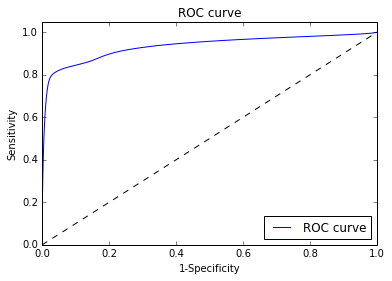

[[ 344582   87657]
 [ 156627 1386638]]
0.876343454632


In [53]:
    #logistic regression
    log_reg = LogisticRegression()
    log_reg.fit(X_train, y_train)
    print ("Intercept is ",log_reg.intercept_)
    print("Coefficient is ",log_reg.coef_)
    y_pred=log_reg.predict(X_test)

    #calculate ROC curve
    preds = log_reg.predict_proba(X_test)[:,1]
    calculate_roc_curve(y_test, preds,2)

    #calculate Confusion Matrix
    calculate_confusion_matrix(y_test, y_pred)

    
    print(accuracy_score(y_test, y_pred))

In [ ]:
    #neural network
    scaler = StandardScaler()
    # Fit only to the training data
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    neural_network_class=MLPClassifier(hidden_layer_sizes=(20,10,20))
    neural_network_class.fit(X_train,y_train)
    predictions = neural_network_class.predict(X_test)
    y_pred=predictions

    #calculate ROC curve
    preds = neural_network_class.predict_proba(X_test)[:,1]
    calculate_roc_curve(Y_test, preds,2)
     #calculate Confusion Matrix
    calculate_confusion_matrix(y_test, y_pred)
    
    print(accuracy_score(y_test, y_pred))

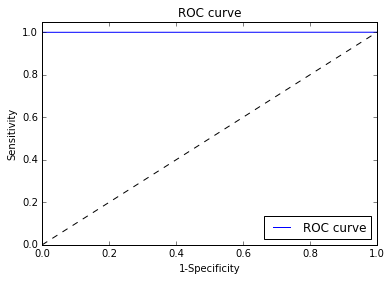

[[ 432230       9]
 [    707 1542558]]
0.999637560845


In [54]:
    #Random Forest
    rf = RandomForestClassifier(n_jobs=2)
    rf.fit(X_train, y_train)
    preds = rf.predict_proba(X_test)[:,1]
    y_pred=rf.predict(X_test)
    #calculate ROC curve
    calculate_roc_curve(y_test, y_pred,2) 
     #calculate Confusion Matrix

    calculate_confusion_matrix(y_test, y_pred)
    print(accuracy_score(y_test, y_pred))

In [ ]:
columns = ['Risk_Score','Debt-To-Income_Ratio','Employment_Length','Policy_Code','accept_reject_loan','State']
from sklearn.preprocessing import LabelEncoder
X = pd.DataFrame(result, columns=columns)
X=dummyEncode(X)
print(X.head())
y=X.accept_reject_loan
X.drop('accept_reject_loan', axis=1, inplace=True)
print(X.head())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
    #logistic regression
    log_reg = LogisticRegression()
    log_reg.fit(X_train, y_train)
    print ("Intercept is ",log_reg.intercept_)
    print("Coefficient is ",log_reg.coef_)
    y_pred=log_reg.predict(X_test)

    #calculate ROC curve
    preds = log_reg.predict_proba(X_test)[:,1]
    calculate_roc_curve(y_test, preds,2)

    #calculate Confusion Matrix
    calculate_confusion_matrix(y_test, y_pred)

    
    print(accuracy_score(y_test, y_pred))